<b>The Sparks Foundation: Data Science and Business Analytics Internship</b>

<b>Task 6: Prediction Using Decision Tree Algorithm </b> <br>

Create the decision tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier it would be able to predict the right class accordingly.



<b>Author: Kadambari Mirashi </b>

<b>1) Importing required libraries</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b>2) Data Exploration</b>

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset.shape

(150, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<b>3) Species Analysis</b>

In [7]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So we have total three types of species- <br> <b>Iris-Setose, Iris-Versicolor, and Iris-Virginica</b>

In [8]:
dataset["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

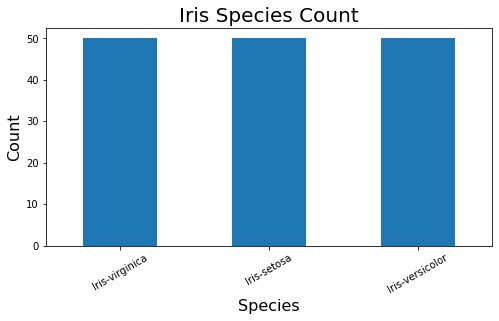

In [10]:
dataset["Species"].value_counts().plot(kind='bar', figsize=(8,4))

plt.title('Iris Species Count', fontsize=20)
plt.xlabel('Species', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=30)
plt.show()

Analysis shows that every species is equal in number i.e 50, <br>So the dataset can be called a <b>A BALANCED SET</b>

<AxesSubplot:>

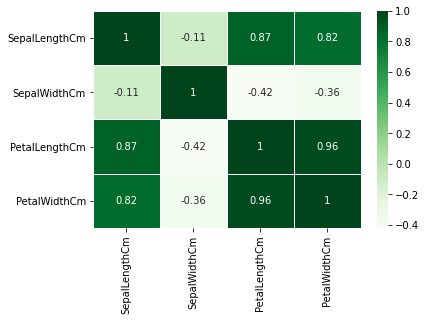

In [22]:
sns.heatmap(dataset.corr(), cmap = 'Greens', annot = True, linewidth = 0.5)

<b>4) Data Splitting</b>

In [25]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:,4].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<b>5) Creating Decision Tree Classifier</b>

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [29]:
print('Accuracy of training set: ',model.score(X_train,y_train))

Accuracy of training set:  1.0


In [30]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [31]:
from sklearn import metrics

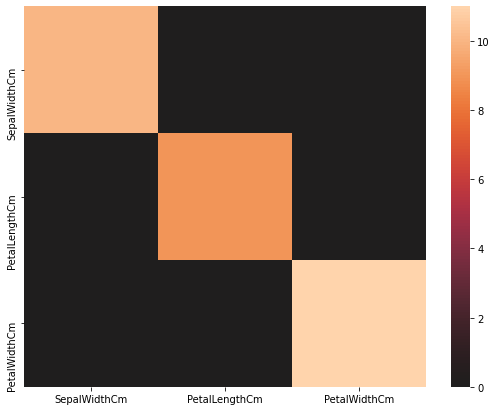

In [33]:
plt.figure(figsize = (9,7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = dataset.iloc[:, 1:4].columns.values,  yticklabels = dataset.iloc[:, 1:4].columns.values, center = 0)
plt.show()

In [34]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


<b>6) Decision Tree Visualization</b>

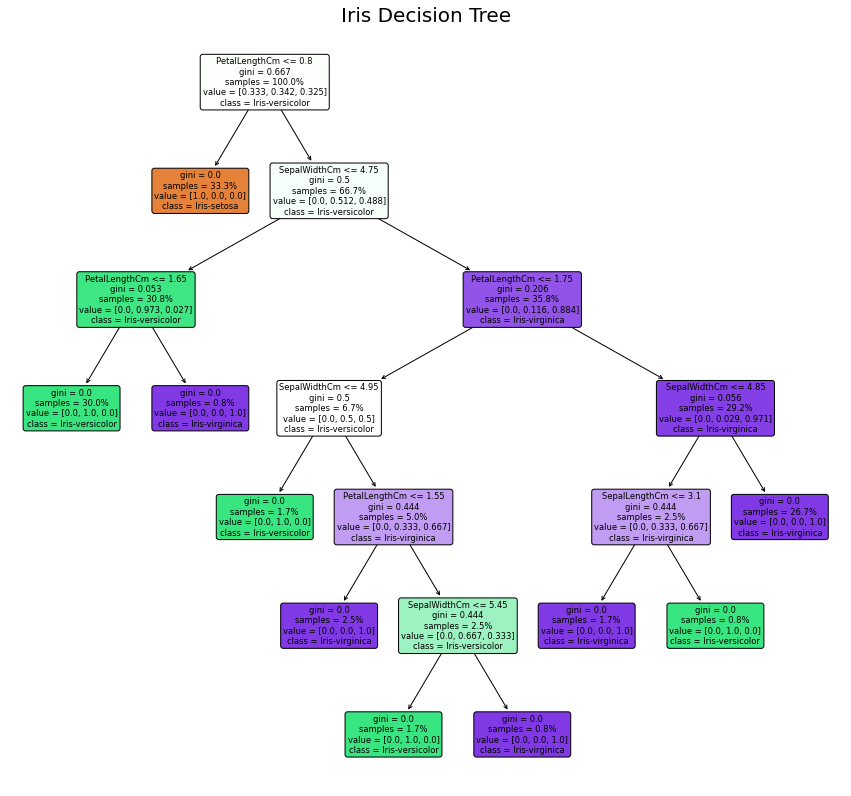

In [47]:
from sklearn import tree

plt.figure(figsize = (15, 14))
tree.plot_tree(model, feature_names= cols , class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
               filled = True, precision = 3,proportion =True, rounded = True)
plt.title("Iris Decision Tree", fontsize=20)
plt.show()

<b>7) Predict the appropriate class for New Data </b>

In [55]:
test1 = [[6.3,2.5,4.9]]
test2 = [[5.1,3.5,1.4]]
test3 = [[1.0,0.3,0.3]]

print('Class for Test1 data is- ',model.predict(test1))
print('Class for Test2 data is- ',model.predict(test2))
print('Class for Test3 data is- ',model.predict(test3))

Class for Test1 data is-  ['Iris-virginica']
Class for Test2 data is-  ['Iris-versicolor']
Class for Test3 data is-  ['Iris-setosa']


<b>THANKYOU</b>